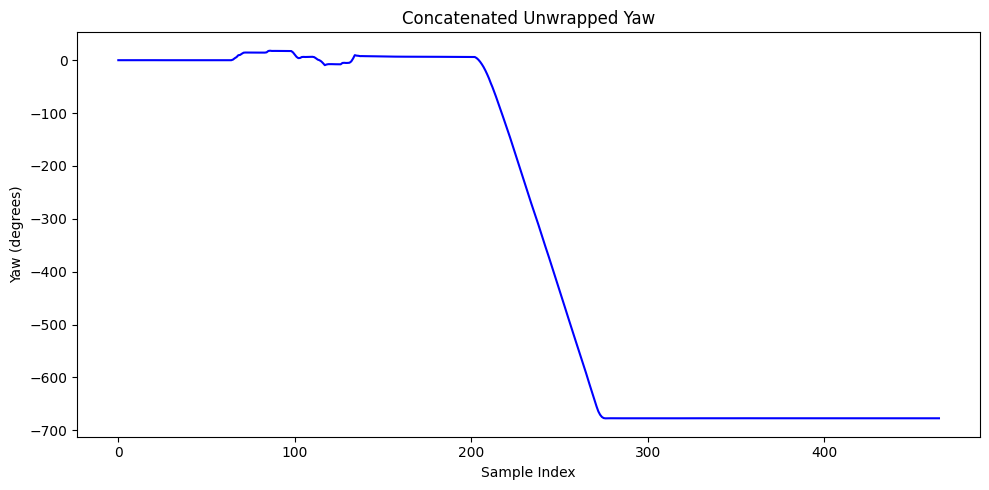

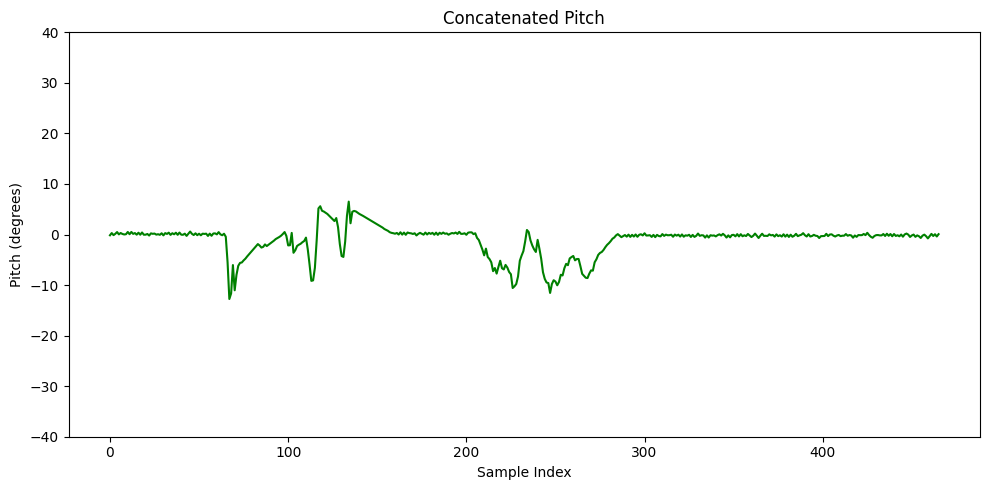

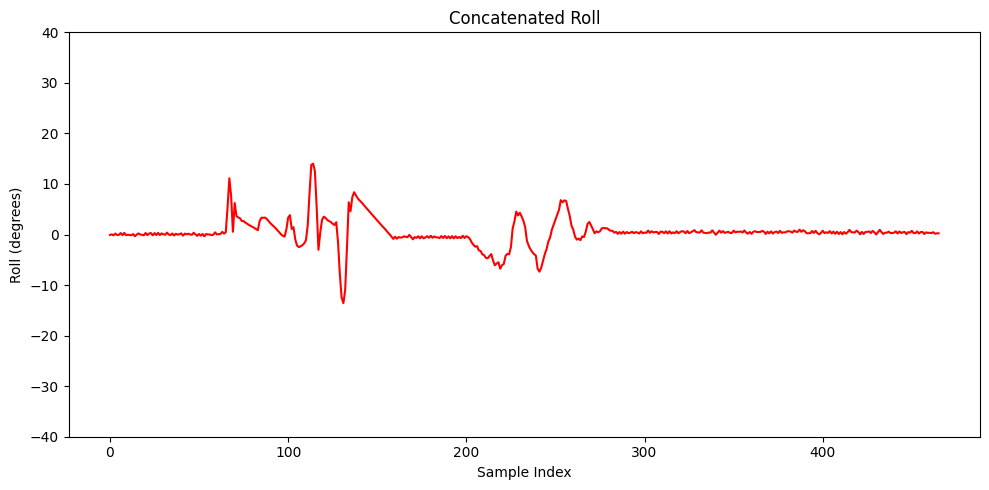

In [29]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('./recordings/12_02_25-imu-tests2/stg_imu_data.csv')

# Convert the string representations of lists into actual Python lists
df['yaw'] = df['yaw'].apply(ast.literal_eval)
df['pitch'] = df['pitch'].apply(ast.literal_eval)
df['roll'] = df['roll'].apply(ast.literal_eval)

# Concatenate the frames for each measurement
# This creates one continuous array for yaw, pitch, and roll respectively.
yaw_all = np.concatenate(df['yaw'].tolist())
pitch_all = np.concatenate(df['pitch'].tolist())
roll_all = np.concatenate(df['roll'].tolist())

# Unwrap the yaw values:
# Convert yaw from degrees to radians, unwrap, then convert back to degrees.
yaw_unwrapped = np.rad2deg(np.unwrap(np.deg2rad(yaw_all)))

# Plot the concatenated unwrapped yaw
plt.figure(figsize=(10, 5))
plt.plot(yaw_unwrapped, linestyle='-', color='blue')
plt.xlabel("Sample Index")
plt.ylabel("Yaw (degrees)")
#plt.ylim([-180, 180])
plt.title("Concatenated Unwrapped Yaw")
plt.tight_layout()
plt.show()

# Plot the concatenated pitch
plt.figure(figsize=(10, 5))
plt.plot(pitch_all, linestyle='-', color='green')
plt.xlabel("Sample Index")
plt.ylabel("Pitch (degrees)")
plt.ylim([-40, 40])
plt.title("Concatenated Pitch")
plt.tight_layout()
plt.show()

# Plot the concatenated roll
plt.figure(figsize=(10, 5))
plt.plot(roll_all, linestyle='-', color='red')
plt.ylim([-40, 40])
plt.xlabel("Sample Index")
plt.ylabel("Roll (degrees)")
plt.title("Concatenated Roll")
plt.tight_layout()
plt.show()